# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [5]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0

## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [6]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [7]:
# show the first review
print data[1]

{u'votes': {u'funny': 0, u'useful': 0, u'cool': 0}, u'user_id': u'0a2KyEL0d3Yb1V6aivbIuQ', u'review_id': u'IjZ33sJrzXqU-0X6U8NwyA', u'text': u'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was h

In [8]:
print data[1]['votes']

{u'funny': 0, u'useful': 0, u'cool': 0}


In [9]:
# convert the list of dictionaries to a DataFrame
import pandas as pd
pd.DataFrame(data)



business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
5     -yxfBYGB6SEqszmxJxd97A  2007-12-13  m2CKSsepBCoRYWxiRUsxAg      4   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
7     hW0Ne_HTHEAgGF1rAdmR-g  2012-07-12  JL7GXJ9u4YMx7Rzs05NfiQ      4   
8     wNUea3IXZWD63bbOQaOH-g  2012-08-17  XtnfnYmnJYi71yIuGsXIUA      4   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8v1g  2010-01-11  cGnKNX3I9rthE0-TH24-qA      5   
13    WGNIYMeXPyoWav1APUq7jA  2011-12-23  FvEEw1_OsrYdvwLV5Hrliw      4   
14    yc5AH9H71xJidA_J2mChLA  2010-05-20  pfUwBKYYmUXeiwrhDluQcw      4   
15    Vb9FPCEL6Ly24PNxLBaAFw  2011-03-20  HvqmdqWcerVWO3Gs6zbrOw      2   
16    supigcPNO9IKo6olaTNV-g  2008-10-12  HXP_0Ul-FCmA4f-k9CqvaQ      3   
17    O510Re68mOy9dU490JTKCg  2010-05-03  j4SIzrIy0WrmW4yr4--Khg      5   
18    b5cEoKR8iQliq-yT2_O0LQ  2009-03-06  v0cTd3PNpYCkTyGKSpOfGA      3   
19    4JzzbSbK9wmlOBJZWYfuCg  2011-11-17  a0lCu-j2Sk_kHQsZi_eNgw      4   
20    8FNO4D3eozpIjj0k3q5Zbg  2008-10-08  MuqugTuR5DdIPcZ2IVP3aQ      3   
21    tdcjXyFLMKAsvRhURNOkCg  2011-06-28  LmuKVFh03Uz318VKnUWrxA      5   
22    eFA9dqXT5EA_TrMgbo03QQ  2011-07-13  CQYc8hgKxV4enApDkx0IhA      5   
23    IJ0o6b8bJFAbG6MjGfBebQ  2010-09-05  Dx9sfFU6Zn0GYOckijom-g      1   
24    JhupPnWfNlMJivnWB5druA  2011-05-22  cFtQnKzn2VDpBedy_TxlvA      5   
25    wzP2yNpV5p04nh0injjymA  2010-05-26  ChBeixVZerfFkeO0McdlbA      4   
26    qjmCVYkwP-HDa35jwYucbQ  2013-01-03  kZ4TzrVX6qeF0OvrVTGVEw      5   
27    wct7rZKyZqZftzmAU-vhWQ  2008-03-21  B5h25WK28rJjx4KHm4gr7g      4   
28    vz2zQQSjy-NnnKLZzjjoxA  2011-03-30  Y_ERKao0J5WsRiCtlKSNSA      4   
29    i213sY5rhkfCO8cD-FPr1A  2012-07-12  hre97jjSwon4bn1muHKOJg      4   
...                      ...         ...                     ...    ...   
9970  R6aazv8FB-6BeanY3ag8kw  2009-09-26  gP17ykqduf3AlewSaRb61w      5   
9971  JOZqBKIOB8WEBAWm7v1JFA  2008-07-22  QI9rfeWrZnvK5ojz8cEoRg      5   
9972  OllL0G9Kh_k1lx-2vrFDXQ  2012-10-23  U23UfuxN9DpAU0Dslc5KjQ      4   
9973  XHr5mXFgobOHoxbPJxmYdg  2009-09-28  udMiWjeG0OGcb4nNddDkBg      5   
9974  cdacUBBL2tDbDnB1EfhpQw  2009-12-16  bVU-_x9ijxjEImNluy84OA      2   
9975  EWMwV5V9BxNs_U6nNVMeqw  2007-10-20  g4LsVAoafmUDHiS-_yN4tA      5   
9976  iDYzGVIF1TDWdjHNgNjCVw  2009-09-11  bKjMcpNj0xSu2UI2EFQn1g      3   
9977  iDYzGVIF1TDWdjHNgNjCVw  2012-10-30  qaNZyCUJA6Yp0mvPBCknPQ      5   
9978  9Y3aQAVITkEJYe5vLZr13w  2010-04-01  ZoTUU6EJ1OBNr7mhqxHBLw      5   
9979  GV1P1x9eRb4iZHCxj5_IjA  2012-12-07  eVUs1C4yaVJNrc7SGTAheg      5   
9980  GHYOl_cnERMOhkCK_mGAlA  2011-07-03  Q-y3jSqccdytKxAyo1J0Xg      5   
9981  AX8lx9wHNYT45lyd7pxaYw  2008-11-27  IyunTh7jnG7v3EYwfF3hPw      5   
9982  KV-yJLmlODfUG1Mkds6kYw  2012-02-25  rIgZgxJPWTacq3mV6DfWfg      4   
9983  24V8QQWO6VaVggHdxjQQ_A  2010-06-06  PqiIeFOiVr-tj_FtHGAH2g      3   
9984  wepFVY82q_tuDzG6lQjHWw  2012-02-12  spusZYROtBKw_5tv3gYm4Q      1   
9985  EMGkbiCMfMTflQux-_JY7Q  2012-10-17  wB-f0xfx7WIyrOsRJMkDOg      4   
9986  oCA2OZcd_Jo_ggVmUx3WVw  2012-03-31  ijPZPKKWDqdWOIqYkUsJJw      4   
9987  r-a-Cn9hxdEnYTtVTB5bMQ  2012-04-07  j9HwZZoBBmJgOlqDSuJcxg      1   
9988  xY1sPHTA2RGVFlh5tZhs9g  2012-06-02  TM8hdYqs5Zi1jO5Yrq6E0g      4   
9989  mQUC-ATrFuMQSaDQb93Pug  2011-10-01  ta2P9joJqeFB8BzFp-AzjA      5   
9990  R8VwdLyvsp9iybNqRvm94g  2011-10-03  pcEeHdAJPoFNF23es0kKWg      5   
9991  WJ5mq4EiWYAA4Vif0xDfdg  2011-12-05  

In [10]:
yelp = pd.DataFrame(data)

print yelp

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
5     -yxfBYGB6SEqszmxJxd97A  2007-12-13  m2CKSsepBCoRYWxiRUsxAg      4   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
7     hW0Ne_HTHEAgGF1rAdmR-g  2012-07-12  JL7GXJ9u4YMx7Rzs05NfiQ      4   
8     wNUea3IXZWD63bbOQaOH-g  2012-08-17  XtnfnYmnJYi71yIuGsXIUA      4   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8

In [11]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id                                    votes  
0  rLtl8ZkDX5vH5nAx9C3q5Q  {u'funny': 0, u'useful': 5, u'cool': 2}  
1  0a2KyEL0d3Yb1V6aivbIuQ  {u'funny': 0, u'useful': 0, u'cool': 0}  
2  0hT2KtfLiobPvh6cDC8JQg  {u'funny': 0, u'useful': 1, u'cool': 0}  
3  uZetl9T0NcROGOyFfughhg  {u'funny': 0, u'useful': 2, u'cool': 1}  
4  vYmM4KTsC8ZfQBg-j5MWkw  {u'funny': 0, u'useful': 0, u'cool': 0}

In [12]:
print yelp.votes

0        {u'funny': 0, u'useful': 5, u'cool': 2}
1        {u'funny': 0, u'useful': 0, u'cool': 0}
2        {u'funny': 0, u'useful': 1, u'cool': 0}
3        {u'funny': 0, u'useful': 2, u'cool': 1}
4        {u'funny': 0, u'useful': 0, u'cool': 0}
5        {u'funny': 1, u'useful': 3, u'cool': 4}
6        {u'funny': 4, u'useful': 7, u'cool': 7}
7        {u'funny': 0, u'useful': 1, u'cool': 0}
8        {u'funny': 0, u'useful': 0, u'cool': 0}
9        {u'funny': 0, u'useful': 1, u'cool': 0}
10       {u'funny': 1, u'useful': 3, u'cool': 1}
11       {u'funny': 0, u'useful': 1, u'cool': 1}
12       {u'funny': 0, u'useful': 2, u'cool': 1}
13       {u'funny': 0, u'useful': 2, u'cool': 1}
14       {u'funny': 0, u'useful': 1, u'cool': 1}
15       {u'funny': 0, u'useful': 2, u'cool': 0}
16       {u'funny': 2, u'useful': 4, u'cool': 3}
17       {u'funny': 0, u'useful': 0, u'cool': 0}
18       {u'funny': 4, u'useful': 6, u'cool': 5}
19       {u'funny': 1, u'useful': 1, u'cool': 1}
20       {u'funny': 

In [13]:
print yelp.votes[1]['funny']


0


In [14]:

for m in yelp.votes:
    print m

{u'funny': 0, u'useful': 5, u'cool': 2}
{u'funny': 0, u'useful': 0, u'cool': 0}
{u'funny': 0, u'useful': 1, u'cool': 0}
{u'funny': 0, u'useful': 2, u'cool': 1}
{u'funny': 0, u'useful': 0, u'cool': 0}
{u'funny': 1, u'useful': 3, u'cool': 4}
{u'funny': 4, u'useful': 7, u'cool': 7}
{u'funny': 0, u'useful': 1, u'cool': 0}
{u'funny': 0, u'useful': 0, u'cool': 0}
{u'funny': 0, u'useful': 1, u'cool': 0}
{u'funny': 1, u'useful': 3, u'cool': 1}
{u'funny': 0, u'useful': 1, u'cool': 1}
{u'funny': 0, u'useful': 2, u'cool': 1}
{u'funny': 0, u'useful': 2, u'cool': 1}
{u'funny': 0, u'useful': 1, u'cool': 1}
{u'funny': 0, u'useful': 2, u'cool': 0}
{u'funny': 2, u'useful': 4, u'cool': 3}
{u'funny': 0, u'useful': 0, u'cool': 0}
{u'funny': 4, u'useful': 6, u'cool': 5}
{u'funny': 1, u'useful': 1, u'cool': 1}
{u'funny': 1, u'useful': 4, u'cool': 2}
{u'funny': 2, u'useful': 1, u'cool': 1}
{u'funny': 0, u'useful': 0, u'cool': 0}
{u'funny': 1, u'useful': 1, u'cool': 0}
{u'funny': 0, u'useful': 1, u'cool': 0}


In [15]:
for m in yelp.votes:
    print m['funny']

0
0
0
0
0
1
4
0
0
0
1
0
0
0
0
0
2
0
4
1
1
2
0
1
0
0
0
1
1
0
0
0
0
0
1
3
0
0
0
0
0
1
0
0
1
0
1
1
0
1
1
1
0
0
3
0
2
0
0
0
0
0
1
1
2
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
8
0
3
0
0
0
0
0
9
0
1
2
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
2
0
6
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
9
0
3
1
0
0
0
0
0
0
0
0
0
0
0
1
2
0
0
8
5
1
0
0
0
0
0
0
0
0
5
0
0
0
0
0
39
1
2
0
0
0
0
0
4
0
7
0
0
1
1
0
0
0
3
2
1
1
1
1
0
3
1
0
1
3
0
0
0
0
0
0
1
0
3
0
8
0
0
0
1
0
0
4
0
1
1
0
2
1
0
2
0
0
0
0
1
0
0
1
0
0
0
0
0
0
3
0
0
0
0
1
2
0
0
0
0
0
5
0
0
0
0
0
0
0
0
2
0
2
1
0
0
0
0
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
4
1
0
0
0
1
0
0
0
0
0
0
1
0
0
6
0
2
0
4
7
0
0
2
1
0
1
1
0
1
3
0
0
1
0
0
0
0
0
0
0
0
5
0
0
0
2
0
0
1
1
0
0
0
0
1
1
3
0
1
1
0
0
0
0
0
1
2
0
0
0
0
0
0
0
2
0
0
0
2
12
0
0
0
0
4
0
5
2
5
0
0
0
0
0
2
0
0
0
1
1
0
2
0
0
0
0
2
0
0
0
0
0
0
0
1
0
1
0
0
0
3
0
0
0
0
0
0
1
0
1
0
1
0
16
1
0
1
0
0
0
1
0
2
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
7
0
2
0
3
20
0
1
0
0
0
2
0
0
0
0
5
0
0
0
1
9
0
0
0
2
0
0
0
0
0


In [16]:
funny = []
useful =[]
cool = []
for m in yelp.votes:
    funny.append(m['funny'])
    useful.append(m['useful'])
    cool.append(m['cool'])
    
print funny
print useful
print cool


[0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 4, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 8, 0, 3, 0, 0, 0, 0, 0, 9, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 9, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 8, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 39, 1, 2, 0, 0, 0, 0, 0, 4, 0, 7, 0, 0, 1, 1, 0, 0, 0, 3, 2, 1, 1, 1, 1, 0, 3, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 8, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 2, 0, 4, 7, 0, 0, 2, 1, 0,

In [17]:
print funny


[0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 4, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 8, 0, 3, 0, 0, 0, 0, 0, 9, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 9, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 8, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 39, 1, 2, 0, 0, 0, 0, 0, 4, 0, 7, 0, 0, 1, 1, 0, 0, 0, 3, 2, 1, 1, 1, 1, 0, 3, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 8, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 2, 0, 4, 7, 0, 0, 2, 1, 0,

In [18]:
yelp['funny'] = funny

In [19]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id                                    votes  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q  {u'funny': 0, u'useful': 5, u'cool': 2}      0  
1  0a2KyEL0d3Yb1V6aivbIuQ  {u'funny': 0, u'useful': 0, u'cool': 0}      0  
2  0hT2KtfLiobPvh6cDC8JQg  {u'funny': 0, u'useful': 1, u'cool': 0}      0  
3  uZetl9T0NcROGOyFfughhg  {u'funny': 0, u'useful': 2, u'cool': 1}      0  
4  vYmM4KTsC8ZfQBg-j5MWkw  {u'funny': 0, u'useful': 0, u'cool': 0}      0

In [20]:
yelp.tail()

business_id        date               review_id  stars  \
9995  VY_tvNUCCXGXQeSvJl757Q  2012-07-28  Ubyfp2RSDYW0g7Mbr8N3iA      3   
9996  EKzMHI1tip8rC1-ZAy64yg  2012-01-18  2XyIOQKbVFb6uXQdJ0RzlQ      4   
9997  53YGfwmbW73JhFiemNeyzQ  2010-11-16  jyznYkIbpqVmlsZxSDSypA      4   
9998  9SKdOoDHcFoxK5ZtsgHJoA  2012-12-02  5UKq9WQE1qQbJ0DJbc-B6Q      2   
9999  pF7uRzygyZsltbmVpjIyvw  2010-10-16  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
9995  First visit...Had lunch here today - used my G...  review   
9996  Should be called house of deliciousness!\n\nI ...  review   
9997  I recently visited Olive and Ivy for business ...  review   
9998  My nephew just moved to Scottsdale recently so...  review   
9999  4-5 locations.. all 4.5 star average.. I think...  review   

                     user_id                                    votes  funny  
9995  _eqQoPtQ3e3UxLE4faT6ow  {u'funny': 0, u'useful': 2, u'cool': 1}      0  
9996  ROru4uk5SaYc3rg8IU7SQw  {u'funny': 0, u'useful': 0, u'cool': 0}      0  
9997  gGbN1aKQHMgfQZkqlsuwzg  {u'funny': 0, u'useful': 0, u'cool': 0}      0  
9998  0lyVoNazXa20WzUyZPLaQQ  {u'funny': 0, u'useful': 0, u'cool': 0}      0  
9999  KSBFytcdjPKZgXKQnYQdkA  {u'funny': 0, u'useful': 0, u'cool': 0}      0

In [21]:
yelp.sample(n=5, random_state = 8)

business_id        date               review_id  stars  \
837   yOYFhiTjT-SM4spKtDk92w  2010-06-26  yHwQM9UtZ4lkMMEeS6ak8Q      4   
697   sbD4f8aOsXZ6PJYh1kN4Ag  2011-01-15  47lUbqC14ufZJYEG5-RcOw      3   
1197  4rySWsfL5enT7t4XuVNJuQ  2008-10-28  d9X2rr2pTxaDwJ2H59zaNw      4   
6759  j2a5uJz76rK9uTRgLn5TdQ  2009-01-03  I4pCFQmFbjnOthdqTAOtyQ      4   
5651  mgllPJA6NQXlJurFWAkqQg  2010-01-25  ByTeAp2v-IgMBiqCsxXkjg      5   

                                                   text    type  \
837   Had a very delightful meal here the other day....  review   
697   Westgate has a few more restaurants now but st...  review   
1197  It's 4:00 am on a Friday, you've just finished...  review   
6759  Another lovely mom and pop with fabulous authe...  review   
5651  Oooohhhh baby I loooove your way...everyday......  review   

                     user_id                                    votes  funny  
837   MBLcbQ_miC1c11cfXQRKoQ  {u'funny': 0, u'useful': 1, u'cool': 0}      0  
697   _PzSNcfrCjeBxSLXRoMmgQ  {u'funny': 1, u'useful': 0, u'cool': 0}      1  
1197  waD2euOMPTnTzQ0thq3H6Q  {u'funny': 6, u'useful': 9, u'cool': 8}      6  
6759  1RJORk4w9jxxWBKzOvOptw  {u'funny': 0, u'useful': 1, u'cool': 1}      0  
5651  G_6pOq1gA4jyJ3j8mjOyJw  {u'funny': 0, u'useful': 2, u'cool': 4}      0

In [22]:
print yelp

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
5     -yxfBYGB6SEqszmxJxd97A  2007-12-13  m2CKSsepBCoRYWxiRUsxAg      4   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
7     hW0Ne_HTHEAgGF1rAdmR-g  2012-07-12  JL7GXJ9u4YMx7Rzs05NfiQ      4   
8     wNUea3IXZWD63bbOQaOH-g  2012-08-17  XtnfnYmnJYi71yIuGsXIUA      4   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8

In [23]:
# add DataFrame columns for cool, useful, and funny
yelp['useful'] = useful
yelp['cool'] = cool
print yelp.sample(n=10, random_state = 1)

                 business_id        date               review_id  stars  \
9953  QCxXYA13PtkD3wec47_r8Q  2012-03-14  V2N2TCqnaqMYfg7zXGG-Rg      1   
3850  hGQsnkndreW7b26XC2HVRA  2010-03-17  ScnMz8HfacbcMtZ7lFbo-Q      4   
4962  _TekkyyFeX_8MBepPIxuTg  2012-08-09  IwujucKW_I4Hd-D47N3jWQ      5   
3886  3I8kUGzDOIKz95llTBhIjA  2011-03-26  TSNYg0TTPZWVOcycZliKlQ      5   
5437  KoJ4jNSmqYbmKqcoh-2dNA  2012-01-11  AOVQib06pMJF89eCLW3KIw      2   
8517  rLAeltELaGdQKh_LYIllEA  2012-11-08  7o_zGSWpWsiN8p6TX_v9EA      5   
2041  4meJyPOhuAKzywUJTmu2hw  2008-01-08  rba5dGcJrTPuaA4ScMiRIQ      5   
1989  EzAen1_nwVuiWPKBj9HUpQ  2010-11-05  6oFiNU-pzlmkCtbTlkazFw      2   
1933  3QhPvyen9kSiAxduT8g3bQ  2011-05-19  zpatQBj8m2UAECkMi-SXZg      3   
9984  wepFVY82q_tuDzG6lQjHWw  2012-02-12  spusZYROtBKw_5tv3gYm4Q      1   

                                                   text    type  \
9953  "Hipster,Trendy" ????-I think NOT !!!! Very di...  review   
3850  My husband & I have been going to 

In [24]:
# drop the votes column and then display the head
yelp.drop('votes', axis=1, inplace=True)
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  funny  useful  cool  
0  rLtl8ZkDX5vH5nAx9C3q5Q      0       5     2  
1  0a2KyEL0d3Yb1V6aivbIuQ      0       0     0  
2  0hT2KtfLiobPvh6cDC8JQg      0       1     0  
3  uZetl9T0NcROGOyFfughhg      0       2     1  
4  vYmM4KTsC8ZfQBg-j5MWkw      0       0     0

## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [25]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
print yelp.stars.mean()
print yelp.cool.mean()
print yelp.useful.mean()
print yelp.funny.mean()

3.7775
0.8768
1.4093
0.7013


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

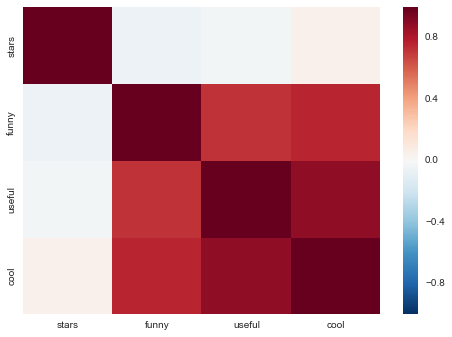

In [27]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
import seaborn as sns
sns.heatmap(yelp.corr())

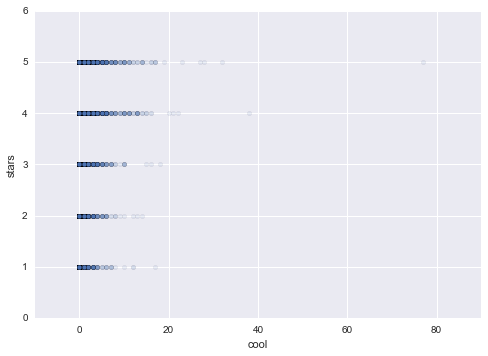

In [28]:
yelp.plot(kind='scatter', x='cool', y='stars', alpha=0.1)

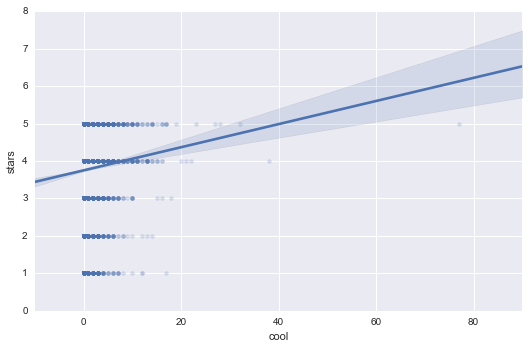

In [29]:
sns.lmplot(x='cool', y='stars', data=yelp, aspect=1.5, scatter_kws={'alpha':0.2})

In [30]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
feature_cols = ['cool', 'useful', 'funny']

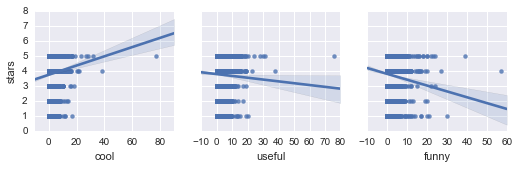

In [31]:
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

In [32]:
print yelp.cool.sum()
print yelp.useful.sum()
print yelp.funny.sum()

8768
14093
7013


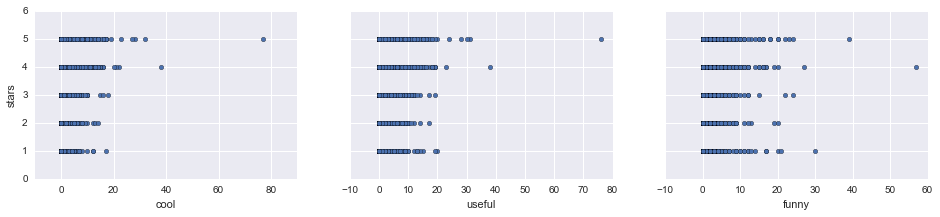

In [33]:
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for stars, feature in enumerate(feature_cols):
    yelp.plot(kind='scatter', x=feature, y='stars', ax=axs[stars], figsize=(16, 3))

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [34]:
x = yelp[feature_cols]
y = yelp.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [35]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x,y)

print linreg.intercept_
print linreg.coef_


3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


In [36]:
zip(feature_cols, linreg.coef_)

[('cool', 0.27435946858853061),
 ('useful', -0.14745239099401478),
 ('funny', -0.13567449053706179)]

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [37]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [38]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    x = yelp[feature_cols]
    y = yelp.stars
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [39]:
# calculate RMSE with all three features
print train_test_rmse(['cool', 'useful', 'funny'])

1.17336862742


## Task 6

Try removing some of the features and see if the RMSE improves.

In [40]:
print train_test_rmse(['cool', 'funny'])

1.1851949299


In [41]:
print train_test_rmse(['useful', 'funny'])

1.20070113589


In [42]:
print train_test_rmse(['cool', 'useful'])

1.18537944234


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [43]:
# new feature:  time of year, length of text

In [44]:
yelp.date

0       2011-01-26
1       2011-07-27
2       2012-06-14
3       2010-05-27
4       2012-01-05
5       2007-12-13
6       2010-02-12
7       2012-07-12
8       2012-08-17
9       2010-08-11
10      2010-06-16
11      2011-10-21
12      2010-01-11
13      2011-12-23
14      2010-05-20
15      2011-03-20
16      2008-10-12
17      2010-05-03
18      2009-03-06
19      2011-11-17
20      2008-10-08
21      2011-06-28
22      2011-07-13
23      2010-09-05
24      2011-05-22
25      2010-05-26
26      2013-01-03
27      2008-03-21
28      2011-03-30
29      2012-07-12
           ...    
9970    2009-09-26
9971    2008-07-22
9972    2012-10-23
9973    2009-09-28
9974    2009-12-16
9975    2007-10-20
9976    2009-09-11
9977    2012-10-30
9978    2010-04-01
9979    2012-12-07
9980    2011-07-03
9981    2008-11-27
9982    2012-02-25
9983    2010-06-06
9984    2012-02-12
9985    2012-10-17
9986    2012-03-31
9987    2012-04-07
9988    2012-06-02
9989    2011-10-01
9990    2011-10-03
9991    2011

In [45]:
yelp.date?

In [46]:
yelp.date[1]

u'2011-07-27'

In [47]:
from datetime import datetime
datestring = yelp.date[1]
dt = datetime.strptime(datestring, '%Y-%m-%d')
print dt.year, dt.month, dt.day



2011 7 27


In [49]:
summer = []
for d in yelp.date:
    dt = datetime.strptime(d, '%Y-%m-%d')
    m = dt.month
    if m == 6 or m == 7 or m ==8:
        summer.append(1)
    else:
        summer.append(0)
   
yelp['summer'] = summer  

In [74]:
winter = []
for d in yelp.date:
    dt = datetime.strptime(d, '%Y-%m-%d')
    m = dt.month
    if m == 11 or m == 12 or m == 1:
        winter.append(1)
    else:
        winter.append(0)
        
yelp['winter'] = winter        

In [51]:
month = []
for z in yelp.date:
    dtm = datetime.strptime(z, '%Y-%m-%d')
    tm = dtm.month
    month.append(tm)
  

In [52]:
yelp['month'] = month

In [75]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  funny  useful  cool  summer  month  text_length  \
0  rLtl8ZkDX5vH5nAx9C3q5Q      0       5     2       0      1          889   
1  0a2KyEL0d3Yb1V6aivbIuQ      0       0     0       1      7         1345   
2  0hT2KtfLiobPvh6cDC8JQg      0       1     0       1      6           76   
3  uZetl9T0NcROGOyFfughhg      0       2     1       0      5          419   
4  vYmM4KTsC8ZfQBg-j5MWkw      0       0     0       0      1          469   

   winter  
0       1  
1       0  
2       0  
3       0  
4       1

In [54]:
len(data[1]['text'])

1345

In [55]:
data[1]['text']

u'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the c

In [56]:
print yelp.text


0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
5       Quiessence is, simply put, beautiful.  Full wi...
6       Drop what you're doing and drive here. After I...
7       Luckily, I didn't have to travel far to make m...
8       Definitely come for Happy hour! Prices are ama...
9       Nobuo shows his unique talents with everything...
10      The oldish man who owns the store is as sweet ...
11      Wonderful Vietnamese sandwich shoppe. Their ba...
12      They have a limited time thing going on right ...
13      Good tattoo shop. Clean space, multiple artist...
14      I'm 2 weeks new to Phoenix. I looked up Irish ...
15      Was it worth the 21$ for a salad and small piz...
16      We went here on a Saturday afternoon and this ...
17      okay t

In [57]:
text_length = []

for tl in yelp.text:
    text_length.append(len(tl))
   
    
print text_length


[889, 1345, 76, 419, 469, 2094, 1565, 274, 349, 186, 298, 321, 433, 593, 1206, 705, 1469, 363, 1161, 726, 565, 104, 148, 594, 294, 1012, 921, 550, 1011, 225, 801, 361, 1734, 332, 610, 1198, 1134, 133, 304, 445, 631, 595, 110, 124, 645, 243, 194, 505, 155, 3783, 1799, 197, 861, 738, 1139, 4997, 2027, 457, 245, 757, 484, 569, 811, 669, 498, 304, 344, 253, 107, 506, 447, 877, 627, 1649, 1054, 320, 1114, 282, 284, 154, 2040, 918, 2416, 473, 2646, 243, 1208, 588, 333, 610, 470, 369, 448, 336, 368, 44, 298, 76, 471, 1507, 683, 59, 579, 1551, 146, 873, 509, 495, 225, 1322, 261, 577, 1076, 1490, 266, 1321, 506, 303, 178, 614, 270, 1138, 271, 1651, 446, 378, 1169, 37, 466, 982, 549, 865, 74, 418, 532, 53, 203, 1486, 711, 53, 240, 1063, 951, 308, 936, 81, 1379, 501, 206, 229, 633, 818, 1444, 271, 998, 1090, 365, 360, 129, 311, 757, 1197, 178, 1619, 663, 32, 202, 462, 333, 1150, 765, 143, 135, 595, 1149, 47, 196, 560, 698, 266, 1039, 329, 1277, 1017, 187, 427, 462, 670, 928, 228, 395, 180, 768, 2

In [58]:
yelp['text_length'] = text_length

In [59]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  funny  useful  cool  summer  month  text_length  
0  rLtl8ZkDX5vH5nAx9C3q5Q      0       5     2       0      1          889  
1  0a2KyEL0d3Yb1V6aivbIuQ      0       0     0       1      7         1345  
2  0hT2KtfLiobPvh6cDC8JQg      0       1     0       1      6           76  
3  uZetl9T0NcROGOyFfughhg      0       2     1       0      5          419  
4  vYmM4KTsC8ZfQBg-j5MWkw      0       0     0       0      1          469

In [60]:
feature_cols = ['cool', 'useful', 'funny', 'text_length']

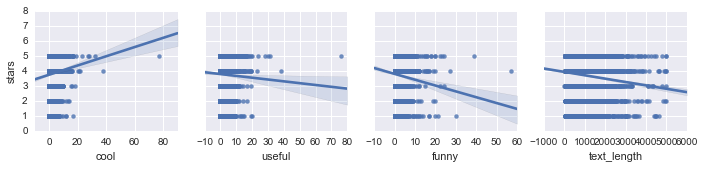

In [61]:
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

In [118]:
# new features: 
feature_cols = ['cool', 'useful', 'funny', 'text_length']

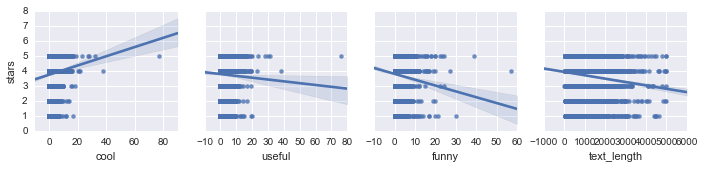

In [119]:
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

In [80]:
count_summer = yelp['summer'].value_counts()
count_summer

0    7402
1    2598
Name: summer, dtype: int64

In [81]:
count_winter = yelp['winter'].value_counts()
print count_winter

0    7529
1    2471
Name: winter, dtype: int64


In [87]:
stars_5 = yelp['stars'] == 5
stars_5.value_counts()

False    6663
True     3337
Name: stars, dtype: int64

In [91]:
count_summer_5_stars = yelp[yelp['summer'] & stars_5]


In [98]:
number_5_summer = len(count_summer_5_stars)
print number_5_summer

874


In [95]:
count_winter_5_stars = yelp[yelp['winter'] & stars_5]

In [99]:
number_5_winter = len(count_winter_5_stars)
print number_5_winter

825


In [107]:
len(yelp)

10000

In [108]:
feature_cols = ['cool', 'useful', 'funny', 'text_length']

In [109]:
x = yelp[feature_cols]
y = yelp.stars

In [110]:

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x,y)

print linreg.intercept_
print linreg.coef_


3.95683672281
[  2.64864405e-01  -1.29385027e-01  -1.27814962e-01  -1.96402535e-04]


In [111]:
zip(feature_cols, linreg.coef_)

[('cool', 0.26486440452066895),
 ('useful', -0.12938502651221828),
 ('funny', -0.127814961603817),
 ('text_length', -0.00019640253479507726)]

In [112]:
def train_test_rmse(feature_cols):
    x = yelp[feature_cols]
    y = yelp.stars
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [113]:
print train_test_rmse(['cool', 'useful', 'funny', 'text_length'])

1.16683462195


In [114]:
print train_test_rmse(['funny', 'text_length'])

1.19350534453


In [115]:
print train_test_rmse(['useful', 'text_length'])

1.19385418546


It looks like the RMSE is the best with the features cool, useful, funny, and text_length.

## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [116]:
# split x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

# create a NumPy array with the same shape as Y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null


array([ 3.7808,  3.7808,  3.7808, ...,  3.7808,  3.7808,  3.7808])

In [117]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2019781029619465